In [349]:
import construction as cs
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp


import dynamic_metrics as ds


import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [352]:
def compute_probs(data, n=10): 
    data = np.array(data)
    h, e = np.histogram(data, n)
    p = h/data.shape[0]
    return e, p

def support_intersection(p, q): 
    sup_int = (
        list(
            filter(
                lambda x: (x[0]!=0) & (x[1]!=0), zip(p, q)
            )
        )
    )
    return sup_int

def get_probs(list_of_tuples): 
    p = np.array([p[0] for p in list_of_tuples])
    q = np.array([p[1] for p in list_of_tuples])
    return p, q

def kl_divergence(p, q): 
    return np.sum(p*np.log(p/q))

def js_divergence(p, q):
    m = (1./2.)*(p + q)
    return (1./2.)*kl_divergence(p, m) + (1./2.)*kl_divergence(q, m)

def compute_kl_divergence(train_sample, test_sample, n_bins=10,js=False): 
    """
    Computes the KL Divergence using the support 
    intersection between two different samples
    """
    E = 0.0000000001
    e, p = compute_probs(train_sample, n=n_bins)
    _, q = compute_probs(test_sample, n=e)
    
    p = np.array(p) + E 
    q = np.array(q) + E 
    
    p = p/sum(p)
    q = q/sum(q)
    
    list_of_tuples = support_intersection(p, q)
    p, q = get_probs(list_of_tuples)
    
    if js:
        return js_divergence(p, q)
    else:
        return kl_divergence(p, q)


In [353]:
import os 

# load sir model

In [354]:
def load_r0(file_name,lambds=["la001"],picco=""):
    ori = []
    stb = []
    etn = []
    tag = []
    for lambd in lambds:
        ori.append(np.load("dynamic_results/SI/"+file_name+"/R0"+picco+"/"+lambd+"/orig.npy"))
        stb.append(np.load("dynamic_results/SI/"+file_name+"/R0"+picco+"/"+lambd+"/stab.npy"))
        etn.append(np.load("dynamic_results/SI/"+file_name+"/R0"+picco+"/"+lambd+"/etn.npy"))
        tag.append(np.load("dynamic_results/SI/"+file_name+"/R0"+picco+"/"+lambd+"/tag.npy"))
    #return ori,stb,etn,stm,tag,dym
    #ori,stb,etn,tag,dym stm
    return ori,stb,etn,tag
import math

def load_r0_altri_picchi(file_name,lambds=["la001"],picco=""):
    ori = []
    stb = []
    etn = []
    tag = []
    for lambd in lambds:
        ori.append(np.load("dynamic_results/SI/"+file_name+"/R0"+picco+"/"+lambd+"/orig.npy"))
        stb.append(np.load("dynamic_results/SI/"+file_name+"/R0"+picco+"/"+lambd+"/stab.npy"))
        etn.append(np.load("dynamic_results/SI/"+file_name+"/R0"+picco+"/"+lambd+"/etn.npy"))
        tag.append(np.load("dynamic_results/SI/"+file_name+"/R0"+picco+"/"+lambd+"/tag.npy"))

    return ori,stb,etn,tag

import math


# example of calculating the kl divergence between two mass functions
from math import log2
from scipy.stats import wasserstein_distance as em
from scipy.stats import ks_2samp


def comp_stat_stb(ori,competitor,dist,names):
    
    res = dict()
    c = 0
    for comp in competitor:
        tmp = []
        if dist == "js":
            val = compute_kl_divergence(ori[c], comp, n_bins=50,js=True)
        elif dist == "kl":
            val = compute_kl_divergence(ori[c], comp, n_bins=50,js=False)
        elif dist == "em":
            val = em(ori[c],comp)
        elif dist == "ks":
            val = (ks_2samp(ori[c],comp)[0])

        tmp.append(val)
            
        res[names[c]] = (np.mean(tmp),np.std(tmp))
        c = c + 1 
        
    return res

def comp_stat(ori,competitor,dist,names):
    res = dict()
    c = 0
    for comp in competitor:
        tmp = []
        if dist == "js":
            val = compute_kl_divergence(ori[c], comp, n_bins=50,js=True)
        elif dist == "kl":
            val = compute_kl_divergence(ori[c], comp, n_bins=50,js=False)
        elif dist == "em":
            val = em(ori[c],comp)
        elif dist == "ks":
            val = (ks_2samp(ori[c],comp[0])[0])

        tmp.append(val)
            
        res[names[c]] = (np.mean(tmp),np.std(tmp))
        c = c + 1 
        
    return res


def comp_stat_ori(ori,competitor,dist,names):
    res = dict()
    c = 0
    for comp in competitor:
        tmp = []
        if dist == "js":
            val = compute_kl_divergence(ori[c], comp, n_bins=50,js=True)
        elif dist == "kl":
            val = compute_kl_divergence(ori[c], comp, n_bins=50,js=False)
        elif dist == "em":
            val = em(ori[c],comp)
        elif dist == "ks":
            val = (ks_2samp(ori[c],comp)[0])

        tmp.append(val)
            
        res[names[c]] = (np.mean(tmp),np.std(tmp))
        c = c + 1 
        
    return res



def plot_r0(ax,file_name,lambs,picco,dist,stab=False):
    if picco == "":
        ori,stb,etn,tag = load_r0(file_name,lambds=lambs,picco=picco)
        
        x1 = np.array(list(comp_stat_stb(ori,stb,dist=dist,names=lambs).values()))
        x2 = np.array(list(comp_stat_ori(ori,etn,dist=dist,names=lambs).values()))
        x4 = np.array(list(comp_stat_ori(ori,tag,dist=dist,names=lambs).values()))
        
    else:
        ori,stb,etn,tag = load_r0_altri_picchi(file_name,lambds=lambs,picco=picco)
        
        x1 = np.array(list(comp_stat_stb(ori,stb,dist=dist,names=lambs).values()))
        x2 = np.array(list(comp_stat(ori,etn,dist=dist,names=lambs).values()))
        x4 = np.array(list(comp_stat(ori,tag,dist=dist,names=lambs).values()))

    

    x = np.arange(3)
    width = 0.3

    error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1, capsize=4, capthick=1)

    rects1 = ax.bar(x - 0.15, x2[:,0], width, label='ETN-gen',color=ETN_COLOR)
    rects5 = ax.bar(x + 0.15, x4[:,0], width, label='TagGen',color=TAG_COLOR)
    
    
    ax.plot([-0.35,0.35],[x1[0],x1[0]],linewidth=2, label='Stability',color=ORIGINAL_COLOR)

    ax.plot([1-0.35,1.35],[x1[1],x1[1]],linewidth=2, color=ORIGINAL_COLOR)
    ax.plot([2-0.35,2.35],[x1[2],x1[2]],linewidth=2, color=ORIGINAL_COLOR)


    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)

    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.set_facecolor('#EFEFEF')
    #ax.xaxis.grid(False)

    ax.yaxis.grid(True, color='lightgrey')
    ax.xaxis.grid(False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')



    labels = [r"$\lambda$ = 0.25",r"$\lambda$ = 0.15",r"$\lambda$ = 0.01"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)
    ax.set_ylim((0,1))
    
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [355]:
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal


line_width = 1

p1 = ""
p2 = "_meta"
p3 = "_2picco"
dist = "ks"
lambs = ["la025","la015","la001"]

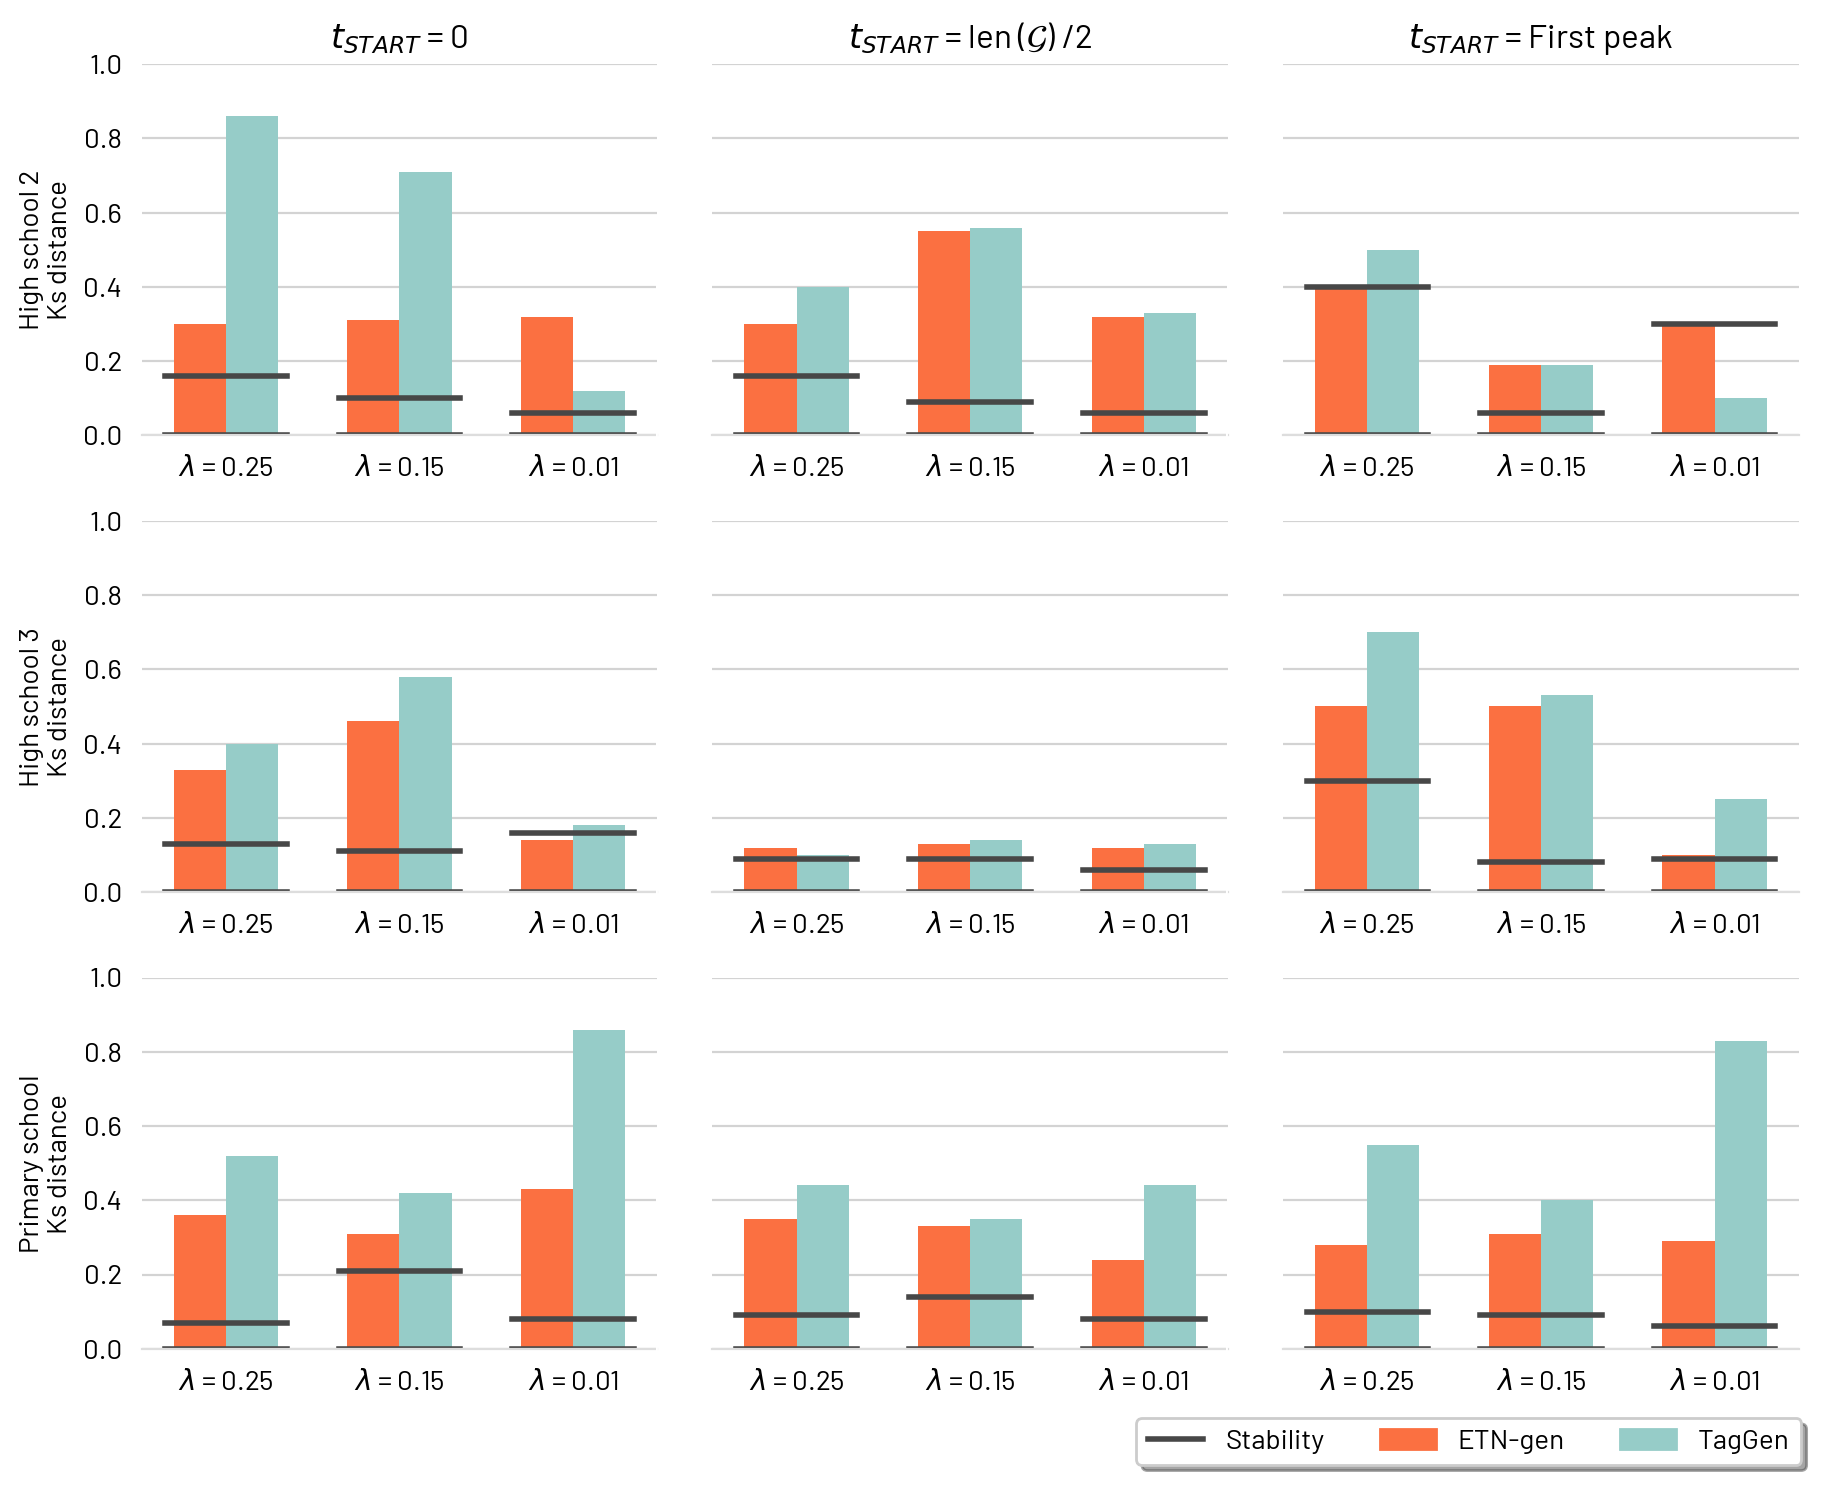

In [356]:
fig, ax = plt.subplots(3,3, figsize=(9,7))
fig.tight_layout(w_pad=-1)

plot_r0(ax[0][0],"High_School12",lambs,p1,dist)
plot_r0(ax[0][1],"High_School12",lambs,p2,dist)
plot_r0(ax[0][2],"High_School12",lambs,p3,dist)
ax[0][0].set_ylabel("High school 2\nKs distance")

plot_r0(ax[1][0],"High_School13",lambs,p1,dist)
plot_r0(ax[1][1],"High_School13",lambs,p2,dist)
plot_r0(ax[1][2],"High_School13",lambs,p3,dist)
ax[1][0].set_ylabel("High school 3\nKs distance")

plot_r0(ax[2][0],"primary_school",lambs,p1,dist)
plot_r0(ax[2][1],"primary_school",lambs,p2,dist)
plot_r0(ax[2][2],"primary_school",lambs,p3,dist,True)
ax[2][0].set_ylabel("Primary school\nKs distance")

ax[0][1].tick_params(axis='y', colors='white')
ax[0][2].tick_params(axis='y', colors='white')
ax[1][1].tick_params(axis='y', colors='white')
ax[1][2].tick_params(axis='y', colors='white')
ax[2][1].tick_params(axis='y', colors='white')
ax[2][2].tick_params(axis='y', colors='white')

ax[0][0].set_title("$t_{START}$ = 0")
ax[0][1].set_title("$t_{START}$ = len ($\mathcal{G}$) /2")
ax[0][2].set_title("$t_{START}$ = First peak")


custom_lines = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=2, label='Line'),
                Patch(facecolor=ETN_COLOR, edgecolor=ETN_COLOR,label='Color Patch'),
               Patch(facecolor=TAG_COLOR, edgecolor=TAG_COLOR,label='Color Patch')]

ax[2][2].legend(custom_lines, ['Stability','ETN-gen', 'TagGen'],
               loc='upper center', bbox_to_anchor=(0.36, -0.15),
          fancybox=True, shadow=True, ncol=5)


#fig.savefig("COM_PHY_new_fig/SIR_model_altri_picchi_SI_face.pdf", bbox_inches = 'tight')

# rw

In [338]:
def load_cov2(file_name,p):
    ori_cov = np.load("dynamic_results/SI/"+file_name+"/coverage"+p+"/orig.npy")
    sta_cov = np.load("dynamic_results/SI/"+file_name+"/coverage"+p+"/stab.npy")
    etn_cov = np.load("dynamic_results/SI/"+file_name+"/coverage"+p+"/etn.npy")
    tag_cov = np.load("dynamic_results/SI/"+file_name+"/coverage"+p+"/tag.npy")
    
    return ori_cov,sta_cov,etn_cov,tag_cov

def load_mfpt2(file_name,p):
    ori_mfpt = np.load("dynamic_results/SI/"+file_name+"/MFPT"+p+"/orig.npy")
    sta_mfpt = np.load("dynamic_results/SI/"+file_name+"/MFPT"+p+"/stab.npy")
    etn_mfpt = np.load("dynamic_results/SI/"+file_name+"/MFPT"+p+"/etn.npy",allow_pickle=True)
    tag_mfpt = np.load("dynamic_results/SI/"+file_name+"/MFPT"+p+"/tag.npy",allow_pickle=True)
    
    return ori_mfpt,sta_mfpt,etn_mfpt,tag_mfpt

def load_cov(file_name,p):
    ori_cov = np.load("dynamic_results/SI/"+file_name+"/coverage"+p+"/orig.npy")
    sta_cov = np.load("dynamic_results/SI/"+file_name+"/coverage"+p+"/stab.npy")
    etn_cov = np.load("dynamic_results/SI/"+file_name+"/coverage"+p+"/etn.npy")
    tag_cov = np.load("dynamic_results/SI/"+file_name+"/coverage"+p+"/tag.npy")
    
    return ori_cov,sta_cov,[etn_cov],[tag_cov]

def load_mfpt(file_name,p):
    ori_mfpt = np.load("dynamic_results/SI/"+file_name+"/MFPT"+p+"/orig.npy")
    sta_mfpt = np.load("dynamic_results/SI/"+file_name+"/MFPT"+p+"/stab.npy")
    etn_mfpt = np.load("dynamic_results/SI/"+file_name+"/MFPT"+p+"/etn.npy",allow_pickle=True)
    tag_mfpt = np.load("dynamic_results/SI/"+file_name+"/MFPT"+p+"/tag.npy",allow_pickle=True)
    
    return ori_mfpt,sta_mfpt,[etn_mfpt],[tag_mfpt]


def compute_cov_mfpt_give_file(file_name,p,fun):

    ori_cov,sta_cov,etn_cov,tag_cov = fun(file_name,p)

    ec_kl = []
    tc_kl = []
    for i in etn_cov:
        ec_kl.append(ks_2samp(ori_cov,i)[0])
    for i in tag_cov:
        tc_kl.append(ks_2samp(ori_cov,i)[0])

    stb = ks_2samp(ori_cov,sta_cov)[0]

    res = [[stb],
           [np.mean(ec_kl),np.std(ec_kl)],[np.mean(tc_kl),np.std(tc_kl)]]

    #res = [[stb],
    #       [np.mean(ec_kl),np.std(ec_kl)/np.sqrt(len(ec_kl))],[np.mean(tc_kl),np.std(tc_kl)/np.sqrt(len(tc_kl))],
    #       [np.mean(sc_kl),np.std(sc_kl)/np.sqrt(len(sc_kl))],[np.mean(dc_kl),np.std(dc_kl)/np.sqrt(len(dc_kl))]]
    
    return res


def plot_rw(ax,file_name,p):
    if p == "":
        cov = compute_cov_mfpt_give_file(file_name,p,load_cov)
        mfpt = compute_cov_mfpt_give_file(file_name,p,load_mfpt)
    else:
        cov = compute_cov_mfpt_give_file(file_name,p,load_cov2)
        mfpt = compute_cov_mfpt_give_file(file_name,p,load_mfpt2)

    x = np.arange(2)

    x1 = np.array([cov[0],mfpt[0]])
    x2 = np.array([cov[1],mfpt[1]])
    x3 = np.array([cov[2],mfpt[2]])

    error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=4, capthick=1)

    width = 0.3
    rects1 = ax.bar(x - 0.15, x2[:,0], width, yerr=x2[:,1], label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
    rects4 = ax.bar(x + 0.15, x3[:,0], width, yerr=x3[:,1], label='STM',color=TAG_COLOR, error_kw=error_bar_style)
    ax.plot([-0.35,0.35],[x1[0],x1[0]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([1-0.35,1.35],[x1[1],x1[1]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)


    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)

    ax.yaxis.grid(True, color='lightgrey')
    ax.xaxis.grid(False)

    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.set_facecolor('#EFEFEF')
    #ax.xaxis.grid(False)


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')    

    labels = ["Coverage","MFPT"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)
    
    #ax.set_ylim((0,1))

In [339]:
p1 = ""
p2 = "_meta"
p3 = "_2picco"


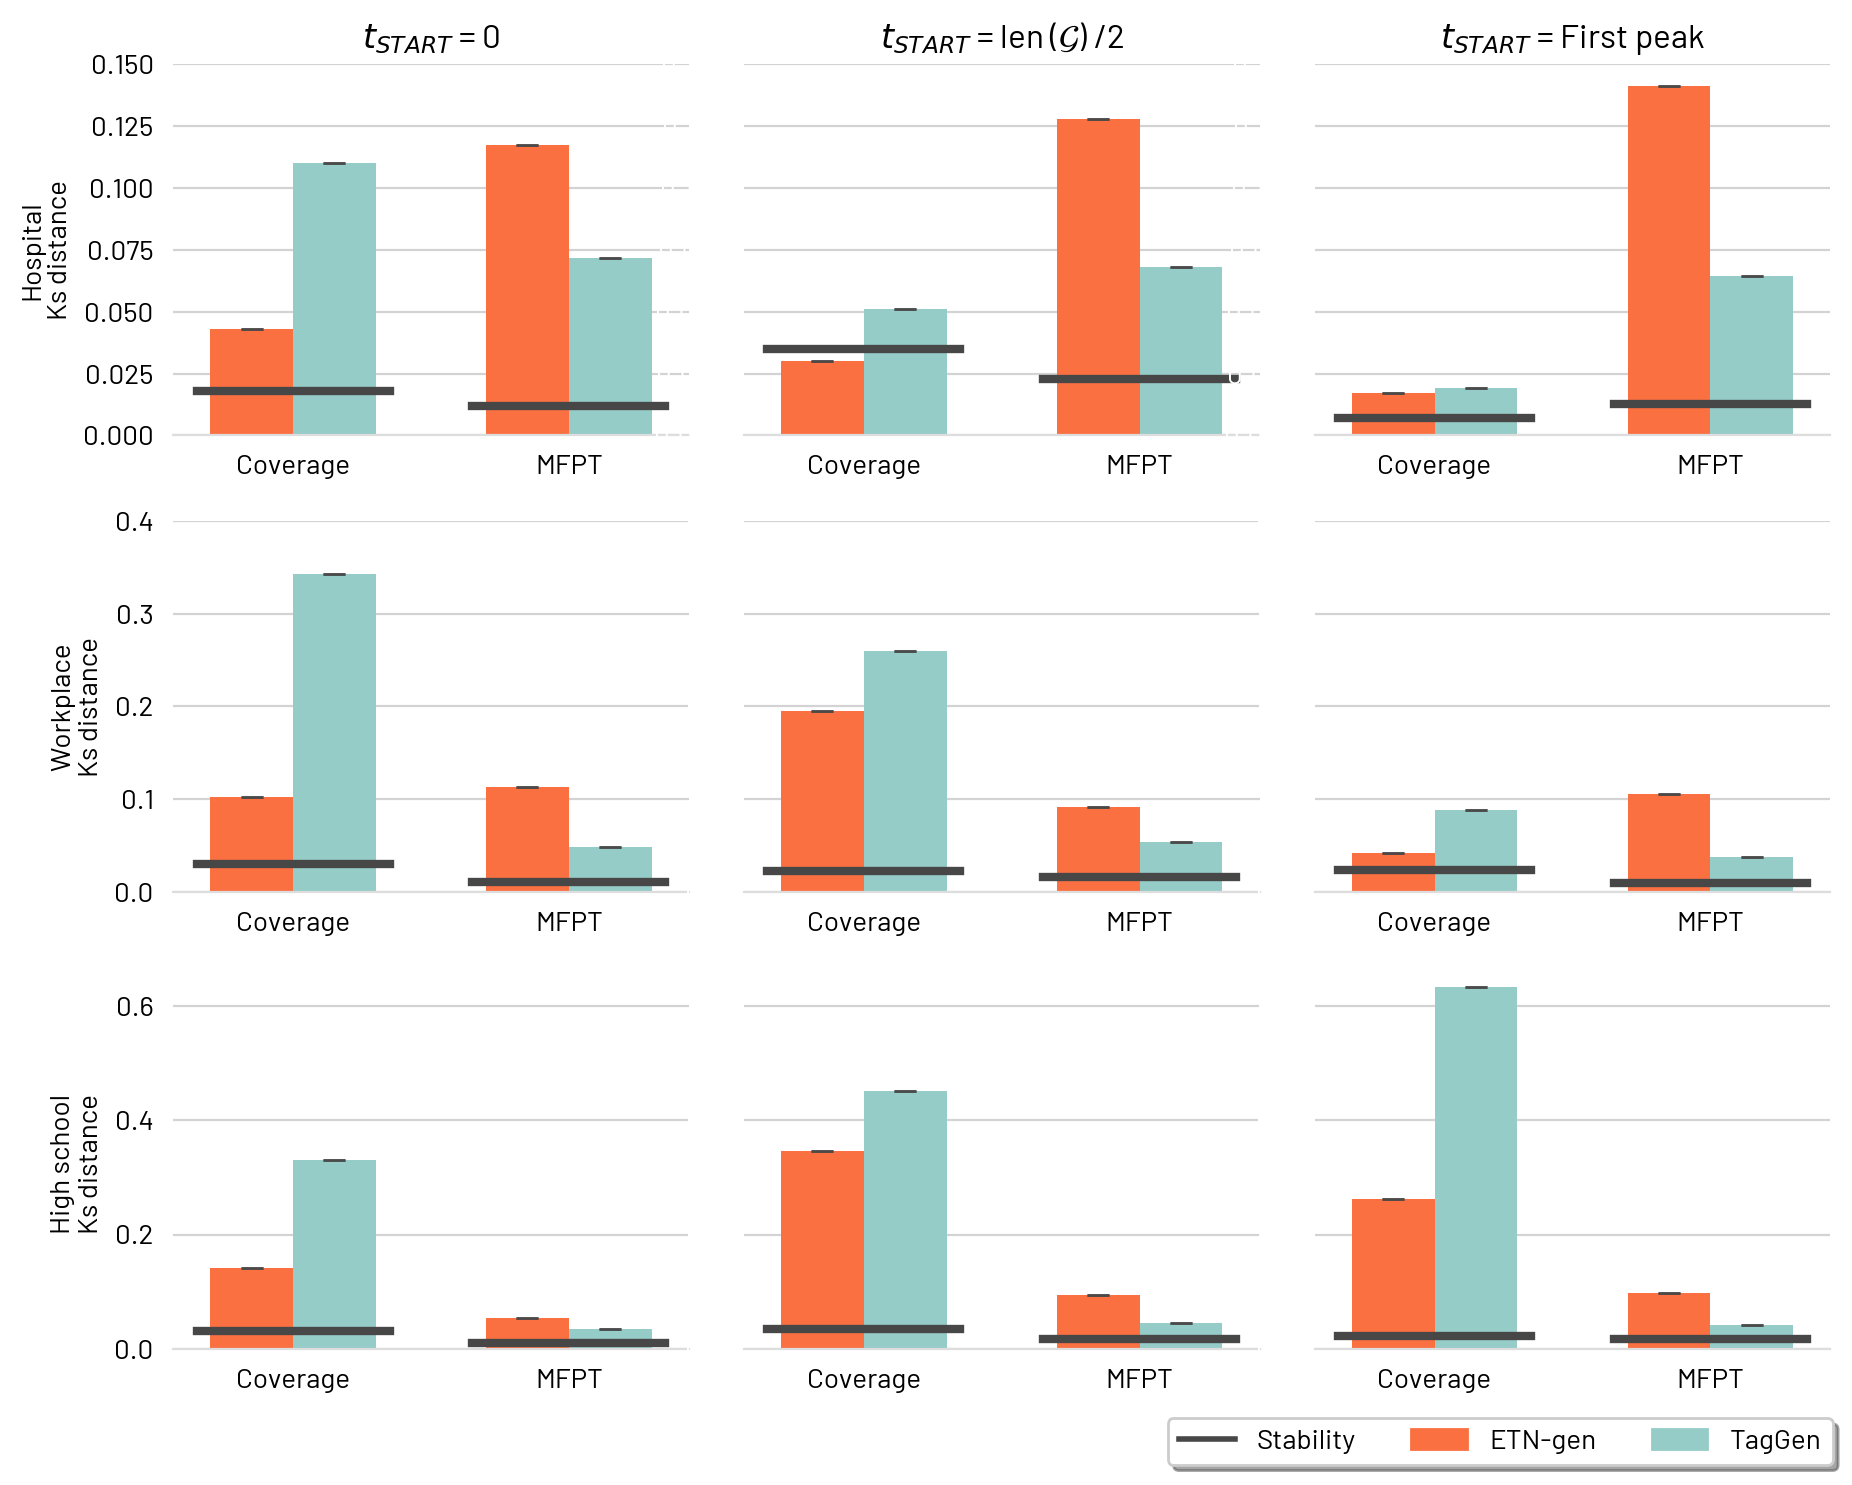

In [340]:

fig, ax = plt.subplots(3,3, figsize=(9,7))
fig.tight_layout(w_pad=-1)


plot_rw(ax[0][0],"High_School12",p1)
plot_rw(ax[0][1],"High_School12",p2)
plot_rw(ax[0][2],"High_School12",p3)


plot_rw(ax[1][0],"High_School13",p1)
plot_rw(ax[1][1],"High_School13",p2)
plot_rw(ax[1][2],"High_School13",p3)


plot_rw(ax[2][0],"primary_school",p1)
plot_rw(ax[2][1],"primary_school",p2)
plot_rw(ax[2][2],"primary_school",p3)




ax[0][0].set_ylabel("Hospital\nKs distance")
ax[1][0].set_ylabel("Workplace\nKs distance")
ax[2][0].set_ylabel("High school\nKs distance")

ax[0][1].tick_params(axis='y', colors='white')
ax[0][2].tick_params(axis='y', colors='white')
ax[1][1].tick_params(axis='y', colors='white')
ax[1][2].tick_params(axis='y', colors='white')
ax[2][1].tick_params(axis='y', colors='white')
ax[2][2].tick_params(axis='y', colors='white')

ax[0][0].set_title("$t_{START}$ = 0")
ax[0][1].set_title("$t_{START}$ = len ($\mathcal{G}$) /2")
ax[0][2].set_title("$t_{START}$ = First peak")


custom_lines = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=2, label='Line'),
                Patch(facecolor=ETN_COLOR, edgecolor=ETN_COLOR,label='Color Patch'),
               Patch(facecolor=TAG_COLOR, edgecolor=TAG_COLOR,label='Color Patch')]


ax[2][2].legend(custom_lines, ['Stability','ETN-gen','TagGen'],
               loc='upper center', bbox_to_anchor=(0.36, -0.15),
          fancybox=True, shadow=True, ncol=5)


for i in range(3):
    ax[0][i].set_ylim((0,0.15))
    
for i in range(3):
    ax[1][i].set_ylim((0,0.4))
    
for i in range(3):
    ax[2][i].set_ylim((0,0.65))

fig.savefig("COM_PHY_new_fig/RW_model_altri_picchi_SI_face.pdf", bbox_inches = 'tight')

# call sms

In [357]:
def load_r0(file_name,lambds=["la001"],picco=""):
    ori = []
    stb = []
    etn = []
    tag = []
    for lambd in lambds:
        ori.append(np.load("dynamic_results/SI/"+file_name+"/R0"+picco+"/"+lambd+"/orig.npy"))
        stb.append(np.load("dynamic_results/SI/"+file_name+"/R0"+picco+"/"+lambd+"/stab.npy"))
        etn.append(np.load("dynamic_results/SI/"+file_name+"/R0"+picco+"/"+lambd+"/etn.npy"))
        tag.append(np.load("dynamic_results/SI/"+file_name+"/R0"+picco+"/"+lambd+"/tag.npy"))
    #return ori,stb,etn,stm,tag,dym
    #ori,stb,etn,tag,dym stm
    return ori,stb,etn,tag
import math

def load_r0_altri_picchi(file_name,lambds=["la001"],picco=""):
    ori = []
    stb = []
    etn = []
    tag = []
    for lambd in lambds:
        ori.append(np.load("dynamic_results/SI/"+file_name+"/R0"+picco+"/"+lambd+"/orig.npy"))
        stb.append(np.load("dynamic_results/SI/"+file_name+"/R0"+picco+"/"+lambd+"/stab.npy"))
        etn.append(np.load("dynamic_results/SI/"+file_name+"/R0"+picco+"/"+lambd+"/etn.npy"))
        tag.append(np.load("dynamic_results/SI/"+file_name+"/R0"+picco+"/"+lambd+"/tag.npy"))

    return ori,stb,etn,tag

import math


# example of calculating the kl divergence between two mass functions
from math import log2
from scipy.stats import wasserstein_distance as em
from scipy.stats import ks_2samp


def comp_stat_stb(ori,competitor,dist,names):
    
    res = dict()
    c = 0
    for comp in competitor:
        tmp = []
        if dist == "js":
            val = compute_kl_divergence(ori[c], comp, n_bins=50,js=True)
        elif dist == "kl":
            val = compute_kl_divergence(ori[c], comp, n_bins=50,js=False)
        elif dist == "em":
            val = em(ori[c],comp)
        elif dist == "ks":
            val = (ks_2samp(ori[c],comp)[0])

        tmp.append(val)
            
        res[names[c]] = (np.mean(tmp),np.std(tmp))
        c = c + 1 
        
    return res

def comp_stat(ori,competitor,dist,names):
    res = dict()
    c = 0
    for comp in competitor:
        tmp = []
        if dist == "js":
            val = compute_kl_divergence(ori[c], comp, n_bins=50,js=True)
        elif dist == "kl":
            val = compute_kl_divergence(ori[c], comp, n_bins=50,js=False)
        elif dist == "em":
            val = em(ori[c],comp)
        elif dist == "ks":
            val = (ks_2samp(ori[c],comp[0])[0])

        tmp.append(val)
            
        res[names[c]] = (np.mean(tmp),np.std(tmp))
        c = c + 1 
        
    return res


def comp_stat_ori(ori,competitor,dist,names):
    res = dict()
    c = 0
    for comp in competitor:
        tmp = []
        if dist == "js":
            val = compute_kl_divergence(ori[c], comp, n_bins=50,js=True)
        elif dist == "kl":
            val = compute_kl_divergence(ori[c], comp, n_bins=50,js=False)
        elif dist == "em":
            val = em(ori[c],comp)
        elif dist == "ks":
            val = (ks_2samp(ori[c],comp)[0])

        tmp.append(val)
            
        res[names[c]] = (np.mean(tmp),np.std(tmp))
        c = c + 1 
        
    return res



def plot_r0(ax,file_name,lambs,picco,dist,stab=False):
    if picco == "":
        ori,stb,etn,tag = load_r0(file_name,lambds=lambs,picco=picco)
        
        x1 = np.array(list(comp_stat_stb(ori,stb,dist=dist,names=lambs).values()))
        x2 = np.array(list(comp_stat_ori(ori,etn,dist=dist,names=lambs).values()))
        x4 = np.array(list(comp_stat_ori(ori,tag,dist=dist,names=lambs).values()))
        
    else:
        ori,stb,etn,tag = load_r0_altri_picchi(file_name,lambds=lambs,picco=picco)
        
        x1 = np.array(list(comp_stat_stb(ori,stb,dist=dist,names=lambs).values()))
        x2 = np.array(list(comp_stat(ori,etn,dist=dist,names=lambs).values()))
        x4 = np.array(list(comp_stat(ori,tag,dist=dist,names=lambs).values()))

    

    x = np.arange(3)
    width = 0.3

    error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1, capsize=4, capthick=1)

    rects1 = ax.bar(x - 0.15, x2[:,0], width, label='ETN-gen',color=ETN_COLOR)
    rects5 = ax.bar(x + 0.15, x4[:,0], width, label='TagGen',color=TAG_COLOR)
    
    
    ax.plot([-0.35,0.35],[x1[0],x1[0]],linewidth=2, label='Stability',color=ORIGINAL_COLOR)

    ax.plot([1-0.35,1.35],[x1[1],x1[1]],linewidth=2, color=ORIGINAL_COLOR)
    ax.plot([2-0.35,2.35],[x1[2],x1[2]],linewidth=2, color=ORIGINAL_COLOR)


    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)

    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.set_facecolor('#EFEFEF')
    #ax.xaxis.grid(False)

    ax.yaxis.grid(True, color='lightgrey')
    ax.xaxis.grid(False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')



    labels = [r"$\lambda$ = 0.25",r"$\lambda$ = 0.15",r"$\lambda$ = 0.01"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)
    ax.set_ylim((0,1))
    
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [359]:
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal


line_width = 1

p1 = ""
p2 = "_meta"
p3 = "_2picco"
dist = "ks"
lambs = ["la025","la015","la001"]

In [366]:
def comp_stat_ori(ori,competitor,dist,names):
    res = dict()
    c = 0
    for comp in competitor:
        tmp = []
        if dist == "js":
            val = compute_kl_divergence(ori[c], comp, n_bins=50,js=True)
        elif dist == "kl":
            val = compute_kl_divergence(ori[c], comp, n_bins=50,js=False)
        elif dist == "em":
            val = em(ori[c],comp)
        elif dist == "ks":
            val = (ks_2samp(ori[c],comp[0])[0])

        tmp.append(val)
            
        res[names[c]] = (np.mean(tmp),np.std(tmp))
        c = c + 1 
        
    return res


In [367]:
ori,stb,etn,tag = load_r0("DTU_calls_1sett",lambds=lambs,picco=p1)

x1 = np.array(list(comp_stat_stb(ori,stb,dist=dist,names=lambs).values()))
x2 = np.array(list(comp_stat_ori(ori,etn,dist=dist,names=lambs).values()))

In [368]:
#file_name = "DTU_calls_1sett"
#file_name = "DTU_SMS_1sett"

#file_name = "FF_calls_1sett"
#file_name = "FF_SMS_1sett"


In [374]:
2.33333*4

9.33332

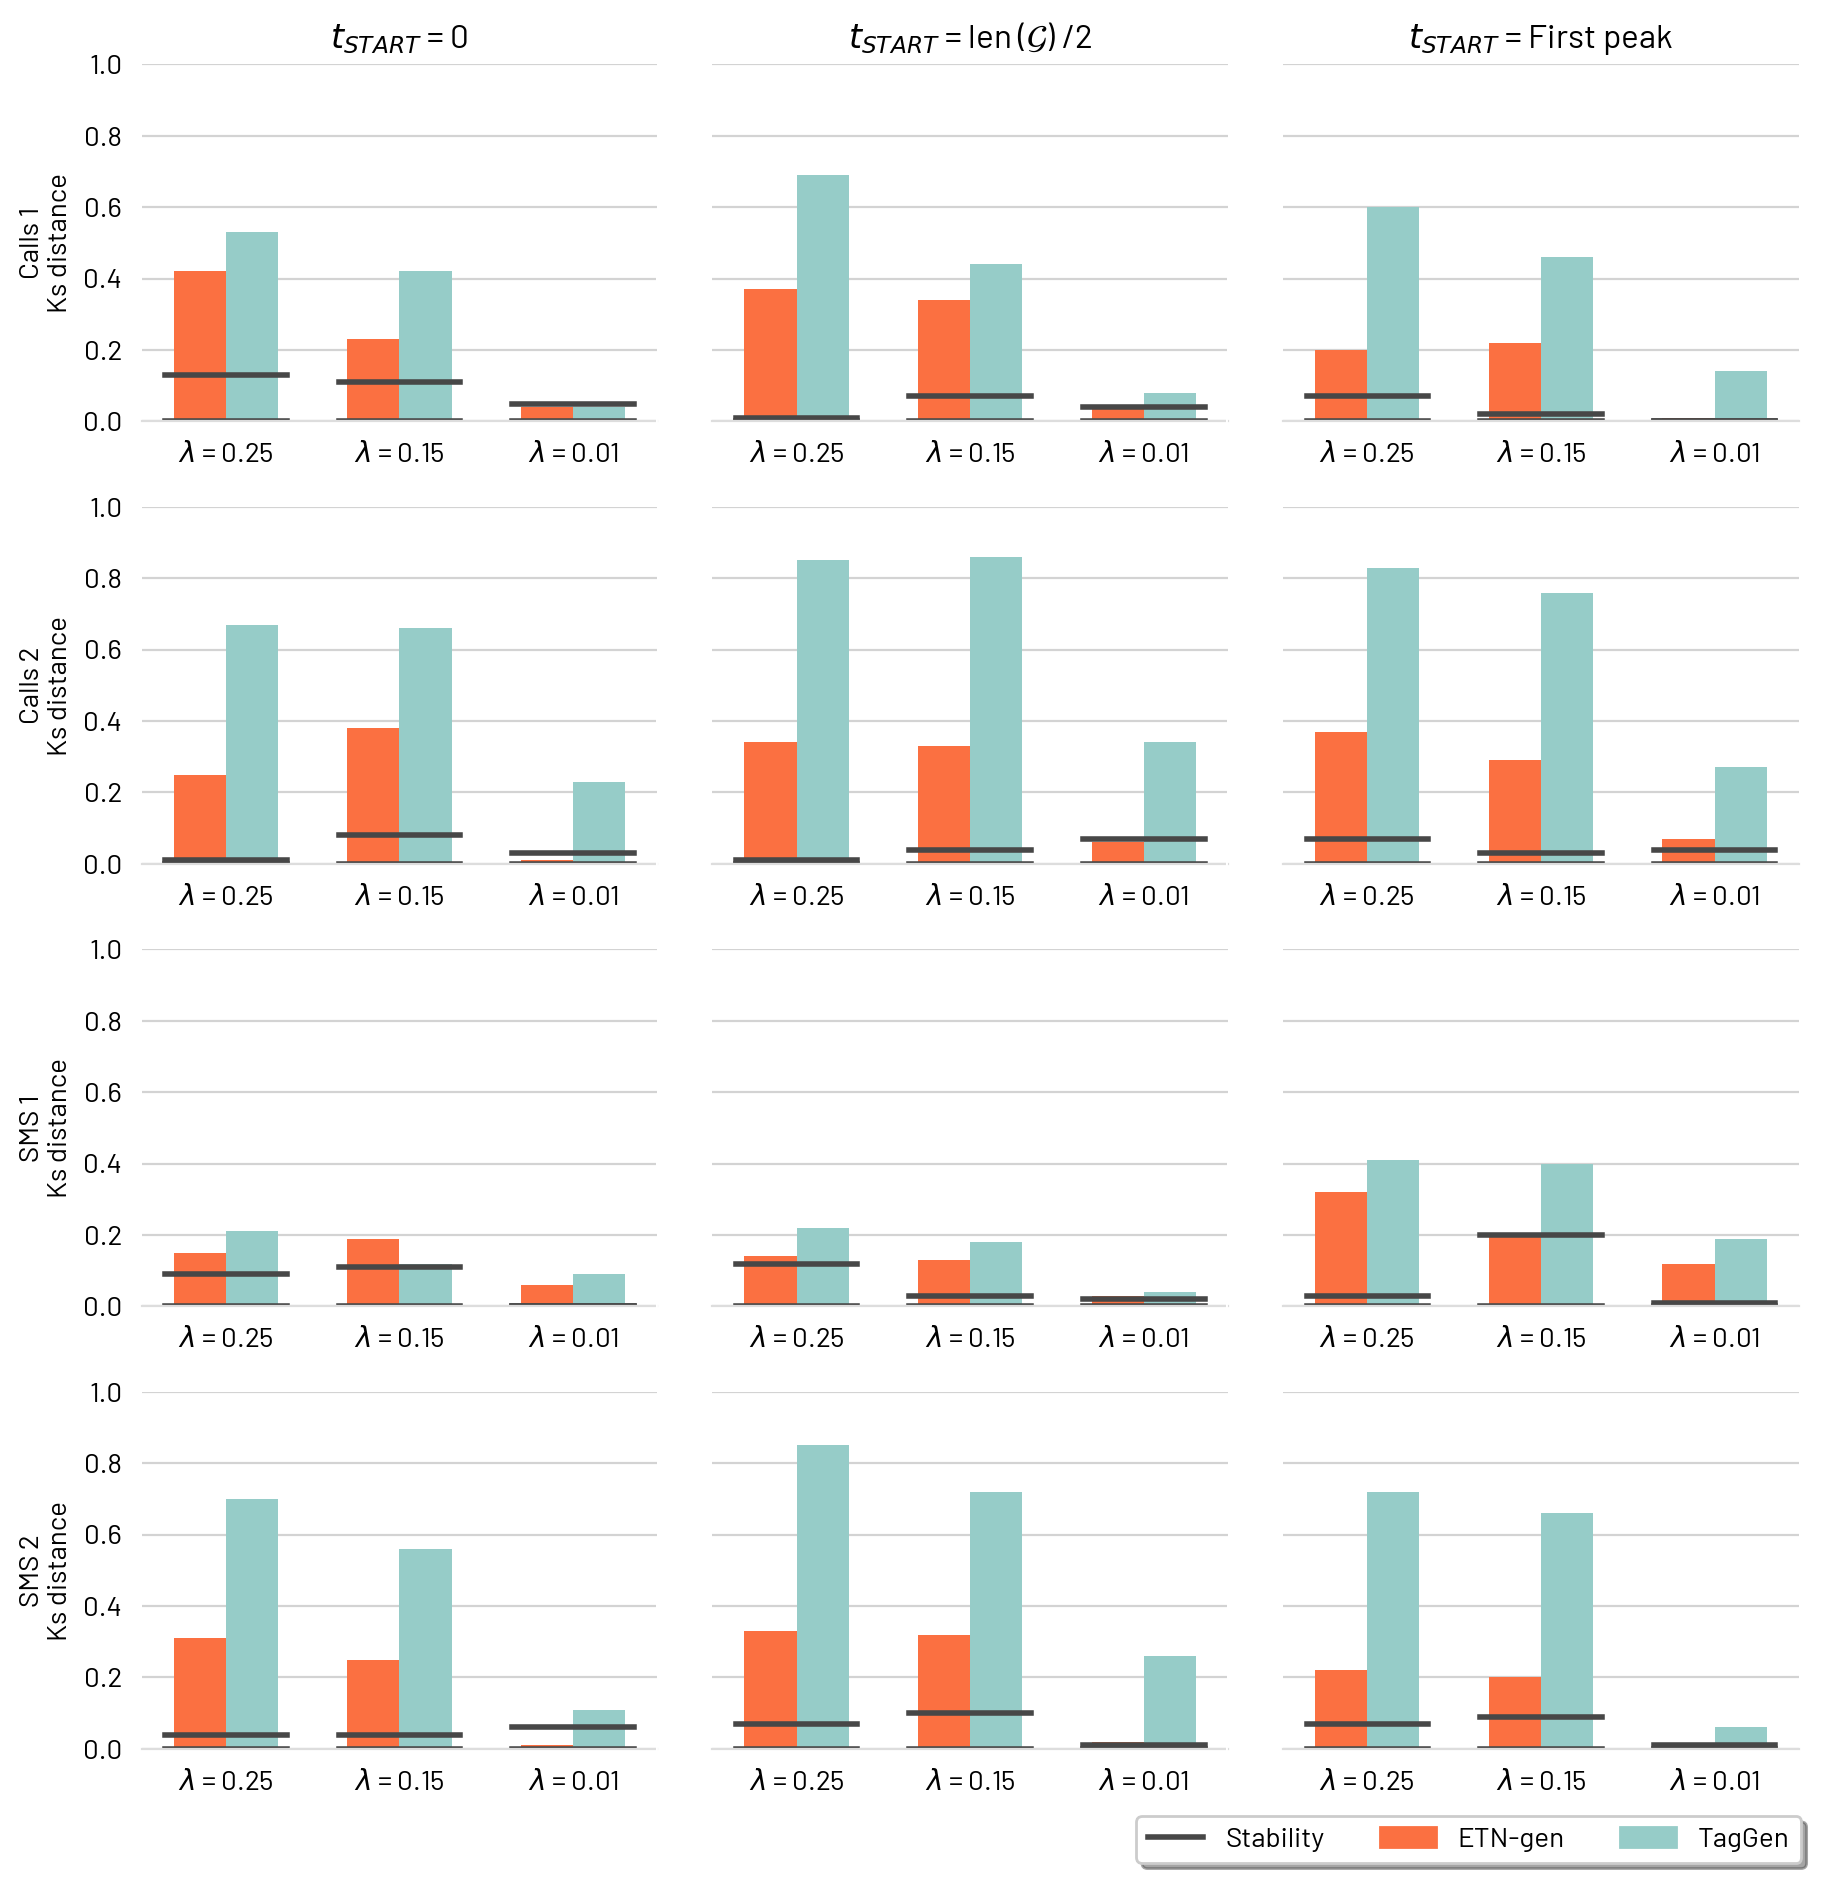

In [381]:


fig, ax = plt.subplots(4,3, figsize=(9,9))
fig.tight_layout(w_pad=-1)

plot_r0(ax[0][0],"DTU_calls_1sett",lambs,p1,dist)
plot_r0(ax[0][1],"DTU_calls_1sett",lambs,p2,dist)
plot_r0(ax[0][2],"DTU_calls_1sett",lambs,p3,dist)
ax[0][0].set_ylabel("Calls 1\nKs distance")

plot_r0(ax[1][0],"FF_calls_1sett",lambs,p1,dist)
plot_r0(ax[1][1],"FF_calls_1sett",lambs,p2,dist)
plot_r0(ax[1][2],"FF_calls_1sett",lambs,p3,dist)
ax[1][0].set_ylabel("Calls 2\nKs distance")

plot_r0(ax[2][0],"DTU_SMS_1sett",lambs,p1,dist)
plot_r0(ax[2][1],"DTU_SMS_1sett",lambs,p2,dist)
plot_r0(ax[2][2],"DTU_SMS_1sett",lambs,p3,dist,True)
ax[2][0].set_ylabel("SMS 1\nKs distance")

plot_r0(ax[3][0],"FF_SMS_1sett",lambs,p1,dist)
plot_r0(ax[3][1],"FF_SMS_1sett",lambs,p2,dist)
plot_r0(ax[3][2],"FF_SMS_1sett",lambs,p3,dist,True)
ax[3][0].set_ylabel("SMS 2\nKs distance")


for i in range(2):
    for j in range(4):
        ax[j][i+1].tick_params(axis='y', colors='white')

ax[0][0].set_title("$t_{START}$ = 0")
ax[0][1].set_title("$t_{START}$ = len ($\mathcal{G}$) /2")
ax[0][2].set_title("$t_{START}$ = First peak")


custom_lines = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=2, label='Line'),
                Patch(facecolor=ETN_COLOR, edgecolor=ETN_COLOR,label='Color Patch'),
               Patch(facecolor=TAG_COLOR, edgecolor=TAG_COLOR,label='Color Patch')]

ax[3][2].legend(custom_lines, ['Stability','ETN-gen', 'TagGen'],
               loc='upper center', bbox_to_anchor=(0.36, -0.15),
          fancybox=True, shadow=True, ncol=5)


fig.savefig("COM_PHY_new_fig/SIR_model_altri_picchi_SI_smsCalls.pdf", bbox_inches = 'tight')

# rw

In [404]:
def load_cov2(file_name,p):
    ori_cov = np.load("dynamic_results/SI/"+file_name+"/coverage"+p+"/orig.npy")
    sta_cov = np.load("dynamic_results/SI/"+file_name+"/coverage"+p+"/stab.npy")
    etn_cov = np.load("dynamic_results/SI/"+file_name+"/coverage"+p+"/etn.npy")
    tag_cov = np.load("dynamic_results/SI/"+file_name+"/coverage"+p+"/tag.npy")
    
    return ori_cov,sta_cov,etn_cov,tag_cov

def load_mfpt2(file_name,p):
    ori_mfpt = np.load("dynamic_results/SI/"+file_name+"/MFPT"+p+"/orig.npy")
    sta_mfpt = np.load("dynamic_results/SI/"+file_name+"/MFPT"+p+"/stab.npy")
    etn_mfpt = np.load("dynamic_results/SI/"+file_name+"/MFPT"+p+"/etn.npy",allow_pickle=True)
    tag_mfpt = np.load("dynamic_results/SI/"+file_name+"/MFPT"+p+"/tag.npy",allow_pickle=True)
    
    return ori_mfpt,sta_mfpt,etn_mfpt,tag_mfpt

def load_cov(file_name,p):
    ori_cov = np.load("dynamic_results/SI/"+file_name+"/coverage"+p+"/orig.npy")
    sta_cov = np.load("dynamic_results/SI/"+file_name+"/coverage"+p+"/stab.npy")
    etn_cov = np.load("dynamic_results/SI/"+file_name+"/coverage"+p+"/etn.npy")
    tag_cov = np.load("dynamic_results/SI/"+file_name+"/coverage"+p+"/tag.npy")
    
    return ori_cov,sta_cov,[etn_cov],[tag_cov]

def load_mfpt(file_name,p):
    ori_mfpt = np.load("dynamic_results/SI/"+file_name+"/MFPT"+p+"/orig.npy")
    sta_mfpt = np.load("dynamic_results/SI/"+file_name+"/MFPT"+p+"/stab.npy")
    etn_mfpt = np.load("dynamic_results/SI/"+file_name+"/MFPT"+p+"/etn.npy",allow_pickle=True)
    tag_mfpt = np.load("dynamic_results/SI/"+file_name+"/MFPT"+p+"/tag.npy",allow_pickle=True)
    
    return ori_mfpt,sta_mfpt,[etn_mfpt],[tag_mfpt]

def plot_rw(ax,file_name,p):
    if p == "":
        cov = compute_cov_mfpt_give_file(file_name,p,load_cov2)
        mfpt = compute_cov_mfpt_give_file(file_name,p,load_mfpt)
    else:
        cov = compute_cov_mfpt_give_file(file_name,p,load_cov2)
        mfpt = compute_cov_mfpt_give_file(file_name,p,load_mfpt2)

    x = np.arange(2)

    x1 = np.array([cov[0],mfpt[0]])
    x2 = np.array([cov[1],mfpt[1]])
    x3 = np.array([cov[2],mfpt[2]])

    error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=4, capthick=1)

    width = 0.3
    rects1 = ax.bar(x - 0.15, x2[:,0], width, yerr=x2[:,1], label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
    rects4 = ax.bar(x + 0.15, x3[:,0], width, yerr=x3[:,1], label='STM',color=TAG_COLOR, error_kw=error_bar_style)
    ax.plot([-0.35,0.35],[x1[0],x1[0]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([1-0.35,1.35],[x1[1],x1[1]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)


    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)

    ax.yaxis.grid(True, color='lightgrey')
    ax.xaxis.grid(False)

    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.set_facecolor('#EFEFEF')
    #ax.xaxis.grid(False)


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')    

    labels = ["Coverage","MFPT"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)
    
    #ax.set_ylim((0,1))

In [405]:
p1 = ""
p2 = "_meta"
p3 = "_2picco"

In [421]:
from scipy.stats import wasserstein_distance as em

In [434]:
def compute_probs(data, n=10): 
    data = np.array(data)
    h, e = np.histogram(data, n)
    p = h/data.shape[0]
    return e, p

def support_intersection(p, q): 
    sup_int = (
        list(
            filter(
                lambda x: (x[0]!=0) & (x[1]!=0), zip(p, q)
            )
        )
    )
    return sup_int

def get_probs(list_of_tuples): 
    p = np.array([p[0] for p in list_of_tuples])
    q = np.array([p[1] for p in list_of_tuples])
    return p, q

def kl_divergence(p, q): 
    return np.sum(p*np.log(p/q))

def js_divergence(p, q):
    m = (1./2.)*(p + q)
    return (1./2.)*kl_divergence(p, m) + (1./2.)*kl_divergence(q, m)

def compute_kl_divergence(train_sample, test_sample, n_bins=10,js=False): 
    """
    Computes the KL Divergence using the support 
    intersection between two different samples
    """
    E = 0.0000000001
    e, p = compute_probs(train_sample, n=n_bins)
    _, q = compute_probs(test_sample, n=e)
    
    p = np.array(p) + E 
    q = np.array(q) + E 
    
    p = p/sum(p)
    q = q/sum(q)
    
    list_of_tuples = support_intersection(p, q)
    p, q = get_probs(list_of_tuples)
    
    if js:
        return js_divergence(p, q)
    else:
        return kl_divergence(p, q)


def compute_cov_mfpt_give_file(file_name,p,fun):

    ori_cov,sta_cov,etn_cov,tag_cov = fun(file_name,p)

    ec_kl = []
    tc_kl = []
    for i in etn_cov:
        ec_kl.append(ks_2samp(ori_cov,i)[0])
    for i in tag_cov:
        tc_kl.append(ks_2samp(ori_cov,i)[0])

    stb = ks_2samp(ori_cov,sta_cov)[0]

    res = [[stb],
           [np.mean(ec_kl),np.std(ec_kl)],[np.mean(tc_kl),np.std(tc_kl)]]

    #res = [[stb],
    #       [np.mean(ec_kl),np.std(ec_kl)/np.sqrt(len(ec_kl))],[np.mean(tc_kl),np.std(tc_kl)/np.sqrt(len(tc_kl))],
    #       [np.mean(sc_kl),np.std(sc_kl)/np.sqrt(len(sc_kl))],[np.mean(dc_kl),np.std(dc_kl)/np.sqrt(len(dc_kl))]]
    
    return res

def compute_cov_mfpt_give_file(file_name,p,fun):

    ori_cov,sta_cov,etn_cov,tag_cov = fun(file_name,p)

    ec_kl = []
    tc_kl = []
    for i in etn_cov:
        ec_kl.append(compute_kl_divergence(ori_cov,i))
    for i in tag_cov:
        tc_kl.append(compute_kl_divergence(ori_cov,i))

    stb = compute_kl_divergence(ori_cov,sta_cov)

    res = [[stb],
           [np.mean(ec_kl),np.std(ec_kl)],[np.mean(tc_kl),np.std(tc_kl)]]

    #res = [[stb],
    #       [np.mean(ec_kl),np.std(ec_kl)/np.sqrt(len(ec_kl))],[np.mean(tc_kl),np.std(tc_kl)/np.sqrt(len(tc_kl))],
    #       [np.mean(sc_kl),np.std(sc_kl)/np.sqrt(len(sc_kl))],[np.mean(dc_kl),np.std(dc_kl)/np.sqrt(len(dc_kl))]]
    
    return res


In [435]:
cov = compute_cov_mfpt_give_file("DTU_calls_1sett","",load_mfpt)

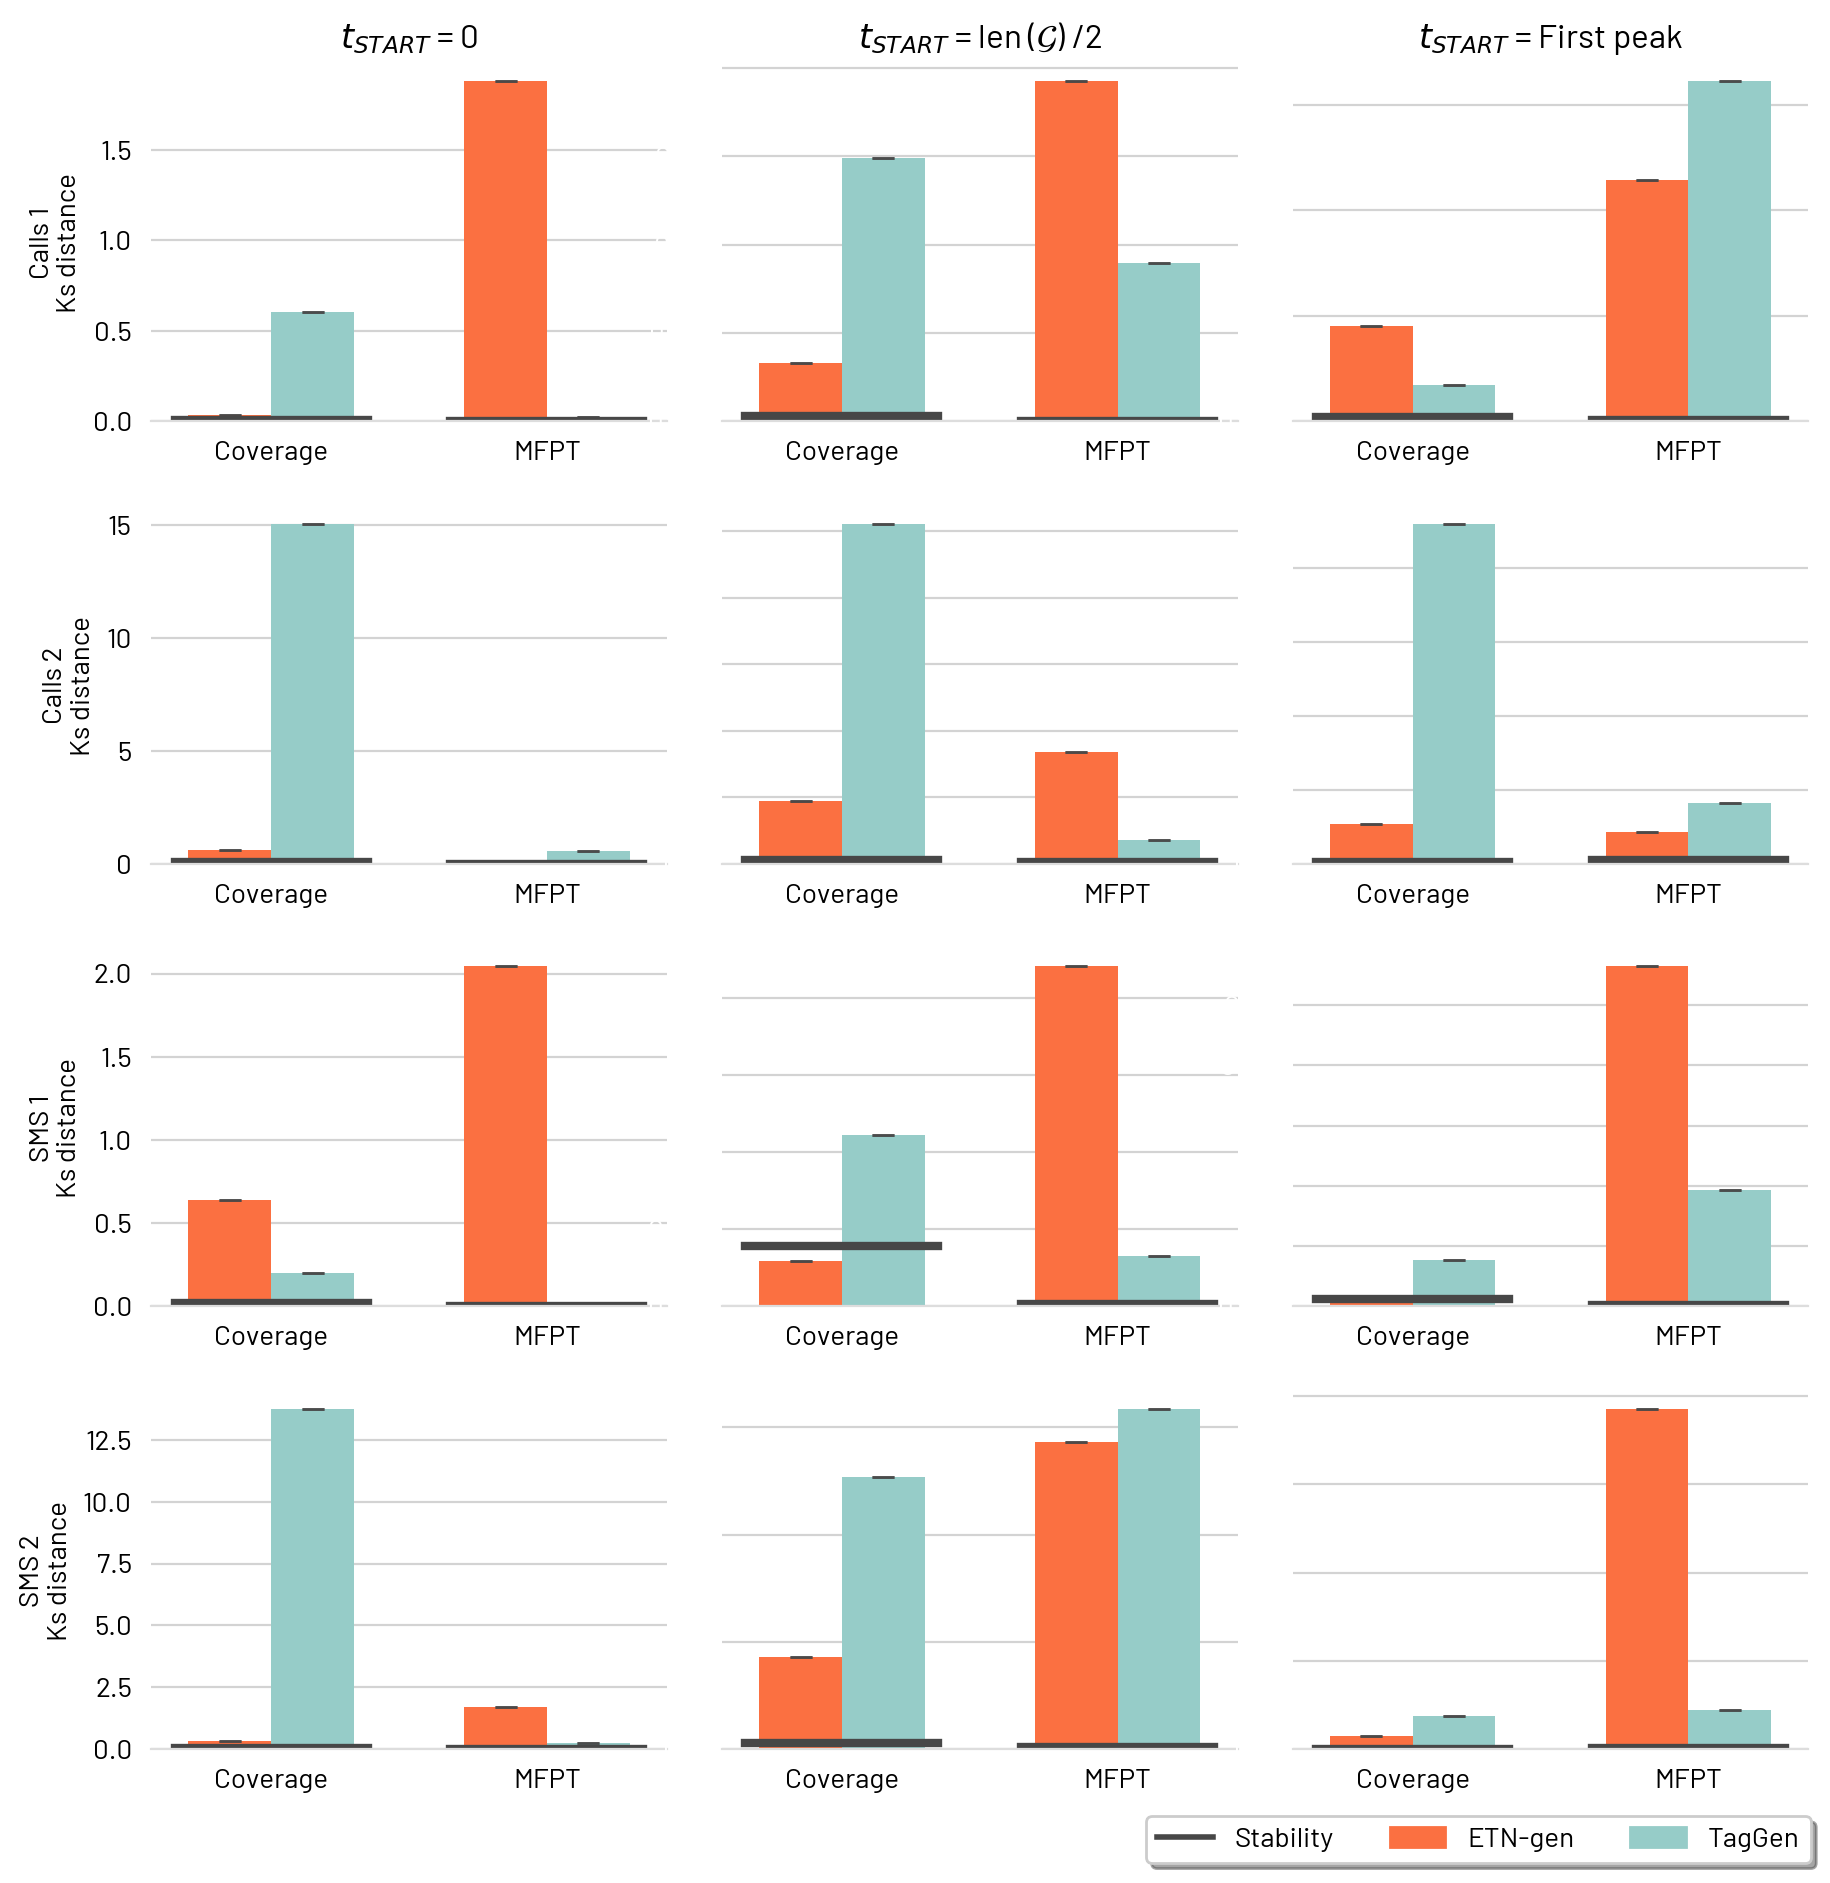

In [436]:



fig, ax = plt.subplots(4,3, figsize=(9,9))
fig.tight_layout(w_pad=-1)


plot_rw(ax[0][0],"DTU_calls_1sett",p1)
plot_rw(ax[0][1],"DTU_calls_1sett",p2)
plot_rw(ax[0][2],"DTU_calls_1sett",p3)

plot_rw(ax[1][0],"FF_calls_1sett",p1)
plot_rw(ax[1][1],"FF_calls_1sett",p2)
plot_rw(ax[1][2],"FF_calls_1sett",p3)

plot_rw(ax[2][0],"DTU_SMS_1sett",p1)
plot_rw(ax[2][1],"DTU_SMS_1sett",p2)
plot_rw(ax[2][2],"DTU_SMS_1sett",p3)


plot_rw(ax[3][0],"FF_SMS_1sett",p1)
plot_rw(ax[3][1],"FF_SMS_1sett",p2)
plot_rw(ax[3][2],"FF_SMS_1sett",p3)




ax[0][0].set_ylabel("Calls 1\nKs distance")
ax[1][0].set_ylabel("Calls 2\nKs distance")
ax[2][0].set_ylabel("SMS 1\nKs distance")
ax[3][0].set_ylabel("SMS 2\nKs distance")


for i in range(2):
    for j in range(4):
        ax[j][i+1].tick_params(axis='y', colors='white')

ax[0][0].set_title("$t_{START}$ = 0")
ax[0][1].set_title("$t_{START}$ = len ($\mathcal{G}$) /2")
ax[0][2].set_title("$t_{START}$ = First peak")


custom_lines = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=2, label='Line'),
                Patch(facecolor=ETN_COLOR, edgecolor=ETN_COLOR,label='Color Patch'),
               Patch(facecolor=TAG_COLOR, edgecolor=TAG_COLOR,label='Color Patch')]


ax[3][2].legend(custom_lines, ['Stability','ETN-gen','TagGen'],
               loc='upper center', bbox_to_anchor=(0.36, -0.15),
          fancybox=True, shadow=True, ncol=5)



#fig.savefig("COM_PHY_new_fig/RW_model_altri_picchi_SI_SMScalls.pdf", bbox_inches = 'tight')